## 1) Importing modules & dataframe

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import softmax_regression as sr
import guassian_naive_bayes as gnb
import utils

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('./Dry_Bean_Dataset.xlsx')

## 2) Preprocessing

### 2.1) Checking out our data

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


We have to predict Class given the rest of the features. And because Class is a discrete variable, this is a classification problem.

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### 2.2) Dealing with missing values

In [5]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
(df == "?").sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

We don't have any missing values. So we are good to go!

### 2.3) Dealing with categorical and non-numeric data

In [7]:
# Checking for categorical and non-numeric data
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


We have only one categorical column here - Class (the target variable). We will do label encoding for it.

In [8]:
df['Class'] = LabelEncoder().fit_transform(df['Class'])

### 2.4) Dropping duplicate rows

In [9]:
# Checking for duplicate rows
df.duplicated().sum()

68

We have 68 duplicate rows. Let's drop them.

In [10]:
df.drop(axis='rows', labels=df.index[df.duplicated()], inplace=True)

In [11]:
df.duplicated().sum()

0

We have no duplicate rows now!

## 3) EDA

### 3.1) Correlation

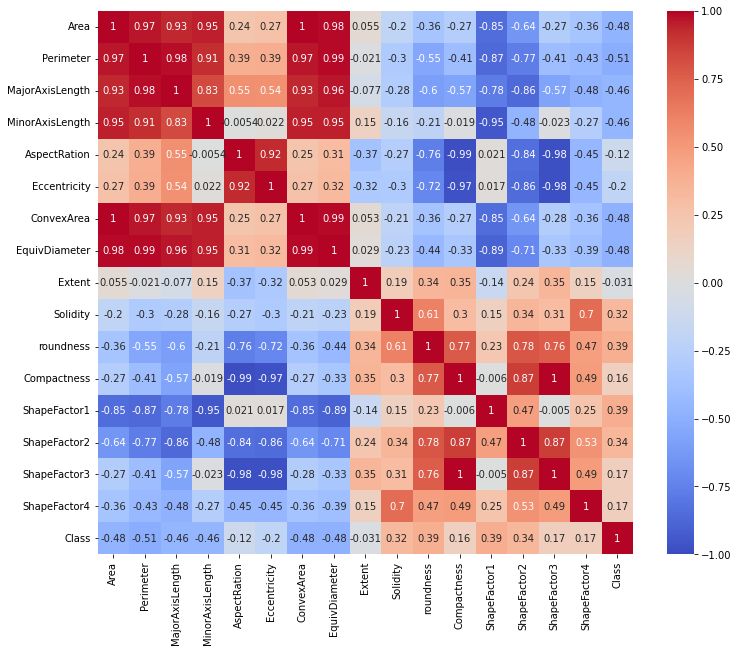

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), vmin=-1, cmap="coolwarm", annot=True)
plt.show()

Area, Perimeter, ConvexArea, EquivDiameter, ShapeFactor1 --> Dependent on MajorAxisLength and MinorAxisLength.   
AspectRation, ShapeFactor3, Compactness --> Dependent on Eccentricity.

Thus we can drop the dependent columns.

In [13]:
df.drop(['Area', 'Perimeter', 'ConvexArea', 'EquivDiameter', 'ShapeFactor1', 'AspectRation', 'ShapeFactor3', 'Compactness'], axis='columns', inplace=True)

In [14]:
df.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,Class
0,208.178117,173.888747,0.549812,0.763923,0.988856,0.958027,0.003147,0.998724,5
1,200.524796,182.734419,0.411785,0.783968,0.984986,0.887034,0.003564,0.998430,5
2,212.826130,175.931143,0.562727,0.778113,0.989559,0.947849,0.003048,0.999066,5
3,210.557999,182.516516,0.498616,0.782681,0.976696,0.903936,0.003215,0.994199,5
4,201.847882,190.279279,0.333680,0.773098,0.990893,0.984877,0.003665,0.999166,5


Columns MajorAxisLength & MinorAxisLength have a correlation of 0.83. Thus, Mutivariate Guassian model would be more suitable here rather than Naive Bayes model.

### 3.2) Outlier detection and removal

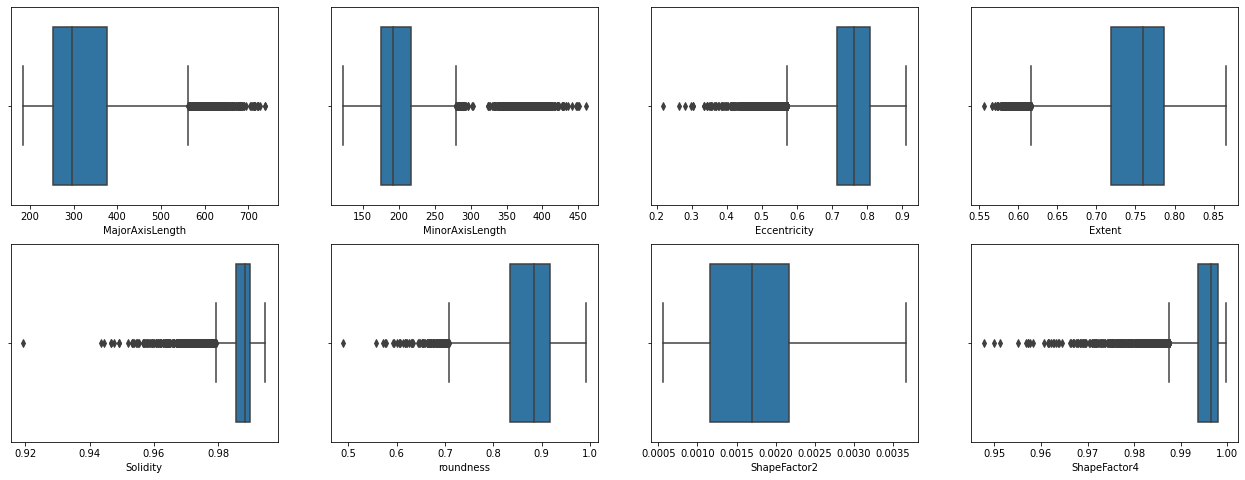

In [15]:
features = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent', 'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4']
fig, ax = plt.subplots(2, 4, figsize=(22, 8))
f = 0
for i in range(2):
  for j in range(4):
    sns.boxplot(ax=ax[i, j], x=df[features[f]])
    f+=1
plt.show()

I tried removing the outliers and what happened was that all of them belonged to a particular class. So, maybe the outliers represent some important information regarding that class. Thus, we will not remove the outliers.

### 3.3) Skew

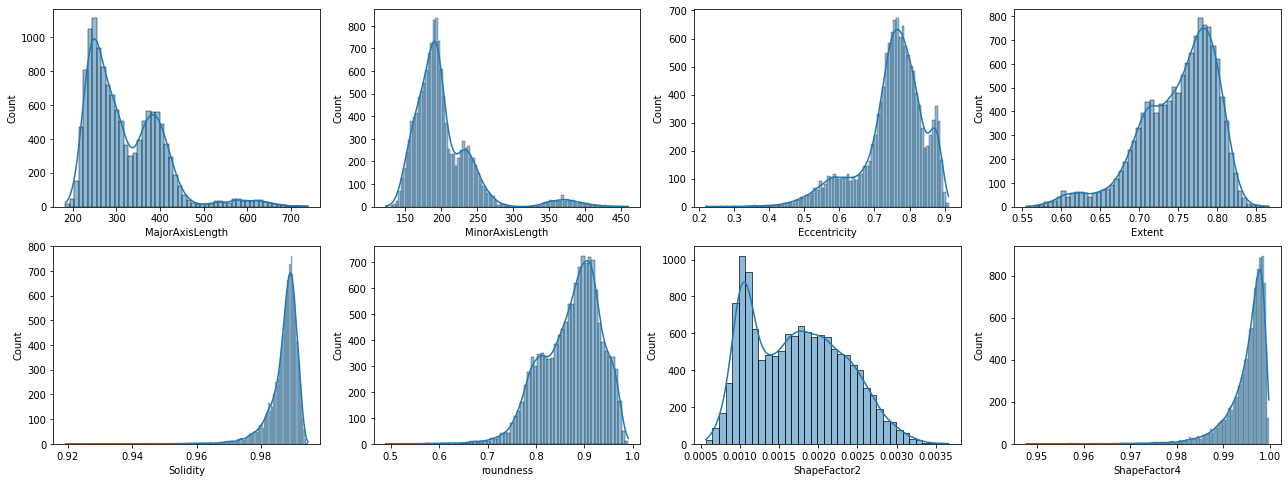

In [16]:
features = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent', 'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4']
fig, ax = plt.subplots(2, 4, figsize=(22, 8))
f = 0
for i in range(2):
  for j in range(4):
    sns.histplot(ax=ax[i, j], data=df[features[f]], kde=True)
    ax[i, j].set_xlabel(features[f])
    f+=1
plt.show()

MajorAxisLength, MinorAxisLength, ShapeFactor2 are right skewed.  
Eccentricity, Extent, Solidity, roundness, ShapeFactor4 are left skewed.

In [17]:
# Removing right skew
right_skewed = ['MajorAxisLength', 'MinorAxisLength', 'ShapeFactor2']
for i in right_skewed:
  df[i] = np.log(df[i])

# Removing left skew
left_skewed = ['Eccentricity', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']
for i in left_skewed:
  df[i] = np.exp(df[i])

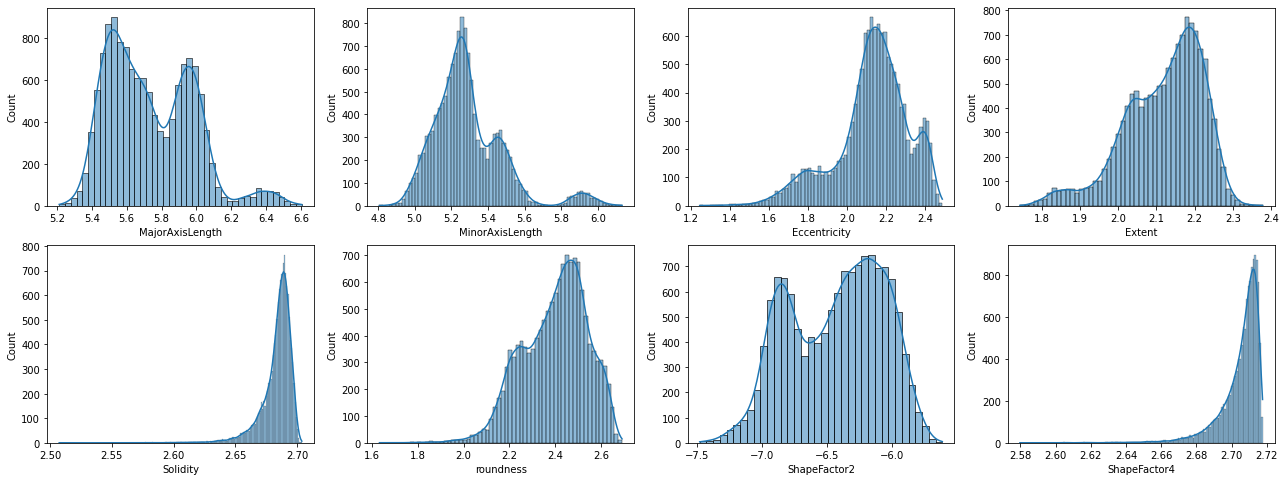

In [18]:
features = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent', 'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4']
fig, ax = plt.subplots(2, 4, figsize=(22, 8))
f = 0
for i in range(2):
  for j in range(4):
    sns.histplot(ax=ax[i, j], data=df[features[f]], kde=True)
    ax[i, j].set_xlabel(features[f])
    f+=1
plt.show()

### 3.4) Normalization and standardization

In [19]:
features = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent', 'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4']
for i in features:
  df[i] = utils.normalize(df[i])

## 4) Softmax Regression

### 4.1) Feature-target split

In [20]:
X = df.drop(axis='columns', labels='Class').to_numpy().astype(np.float64)

# adding a column of ones to data matrix
n, m = X.shape
X =  np.c_[ np.ones(n), X]    

y = df['Class'].to_numpy().astype(np.float64)

### 4.2) Train-test split

In [21]:
X_train, X_test, y_train, y_test = utils.train_test_split(X, y, train_size=0.75)

### 4.3) Training

In [22]:
iters = 1000
W, cost = sr.fit(X_train, y_train, 0.0001, iters)

yhat_train = sr.predict(X_train, W)
print('Metrics for the training data:')
print('Accuracy score', utils.accuracy_score(y_train, yhat_train))
print('f1 score', utils.f1_score(y_train, yhat_train))

Metrics for the training data:
Accuracy score 0.9009550063995274
f1 score 0.9128305193748307


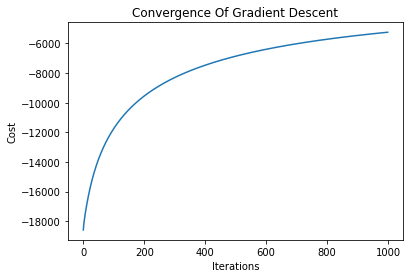

In [23]:
# Convergence of gradient descent
plt.title('Convergence Of Gradient Descent')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(iters), cost)
plt.show()

### 4.4) Testing

In [24]:
yhat_test = sr.predict(X_test, W)
print('Metrics for test data:')
print('Accuracy score', utils.accuracy_score(y_test, yhat_test))
print('f1 score', utils.f1_score(y_test, yhat_test))

Metrics for test data:
Accuracy score 0.900177200236267
f1 score 0.9121240916904377


## 5) Gaussian Naive Bayes

### 5.1) Feature-target split

In [25]:
X = df.drop(axis='columns', labels='Class').to_numpy().astype(np.float64)
y = df['Class'].to_numpy().astype(np.float64)

### 5.2) Train-test split

In [26]:
X_train, X_test, y_train, y_test = utils.train_test_split(X, y, train_size=0.75)

### 5.3) Training

In [27]:
theta = gnb.fit(X_train, y_train)

yhat_train = gnb.predict(X_train, theta)
print('Metrics for the training data:')
print('Accuracy score', utils.accuracy_score(y_train, yhat_train))
print('f1 score', utils.f1_score(y_train, yhat_train))

Metrics for the training data:
Accuracy score 0.9021364576154376
f1 score 0.9145863965573763


### 5.4) Testing

In [28]:
yhat_test = gnb.predict(X_test, theta)
print('Metrics for test data:')
print('Accuracy score', utils.accuracy_score(y_test, yhat_test))
print('f1 score', utils.f1_score(y_test, yhat_test))

Metrics for test data:
Accuracy score 0.9049025398700532
f1 score 0.9161661552779267
